In [1]:
%%capture
! wget https://opencv-tutorial.readthedocs.io/en/latest/_downloads/10e685aad953495a95c17bfecd1649e5/yolov3.cfg -O yolov3.cfg
! wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
! wget https://opencv-tutorial.readthedocs.io/en/latest/_downloads/a9fb13cbea0745f3d11da9017d1b8467/coco.names -O coco.names
! wget https://africaadventurevacations.com/wp-content/uploads/2022/01/Top-ten-Serengeti-National-Park-safari-activities.jpg -O wild.jpg
! wget https://photographylife.com/wp-content/uploads/2019/02/Lady-in-Red.jpg -O street.jpg

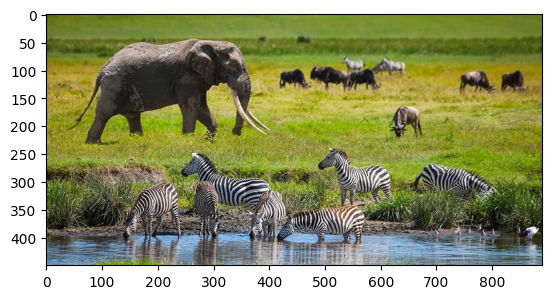

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = cv.imread('wild.jpg')
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [3]:
classes = open('coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

len(classes)

80

In [4]:
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)

ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
print(len(ln), ln)

3 ['yolo_82', 'yolo_94', 'yolo_106']


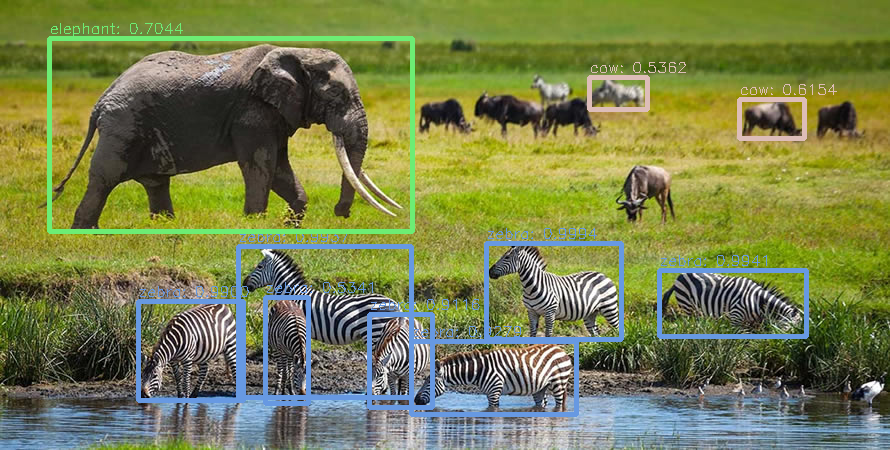

In [5]:
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

net.setInput(blob)
outputs = net.forward(ln)

boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)
     

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 3)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
     

RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = Image.fromarray(RGB_img, 'RGB')
img.show()

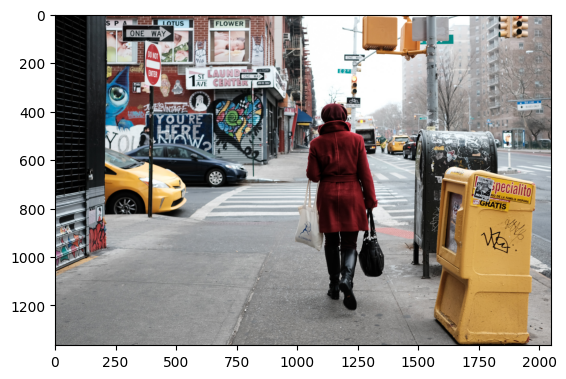

In [8]:
img = cv.imread('street.jpg')
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)

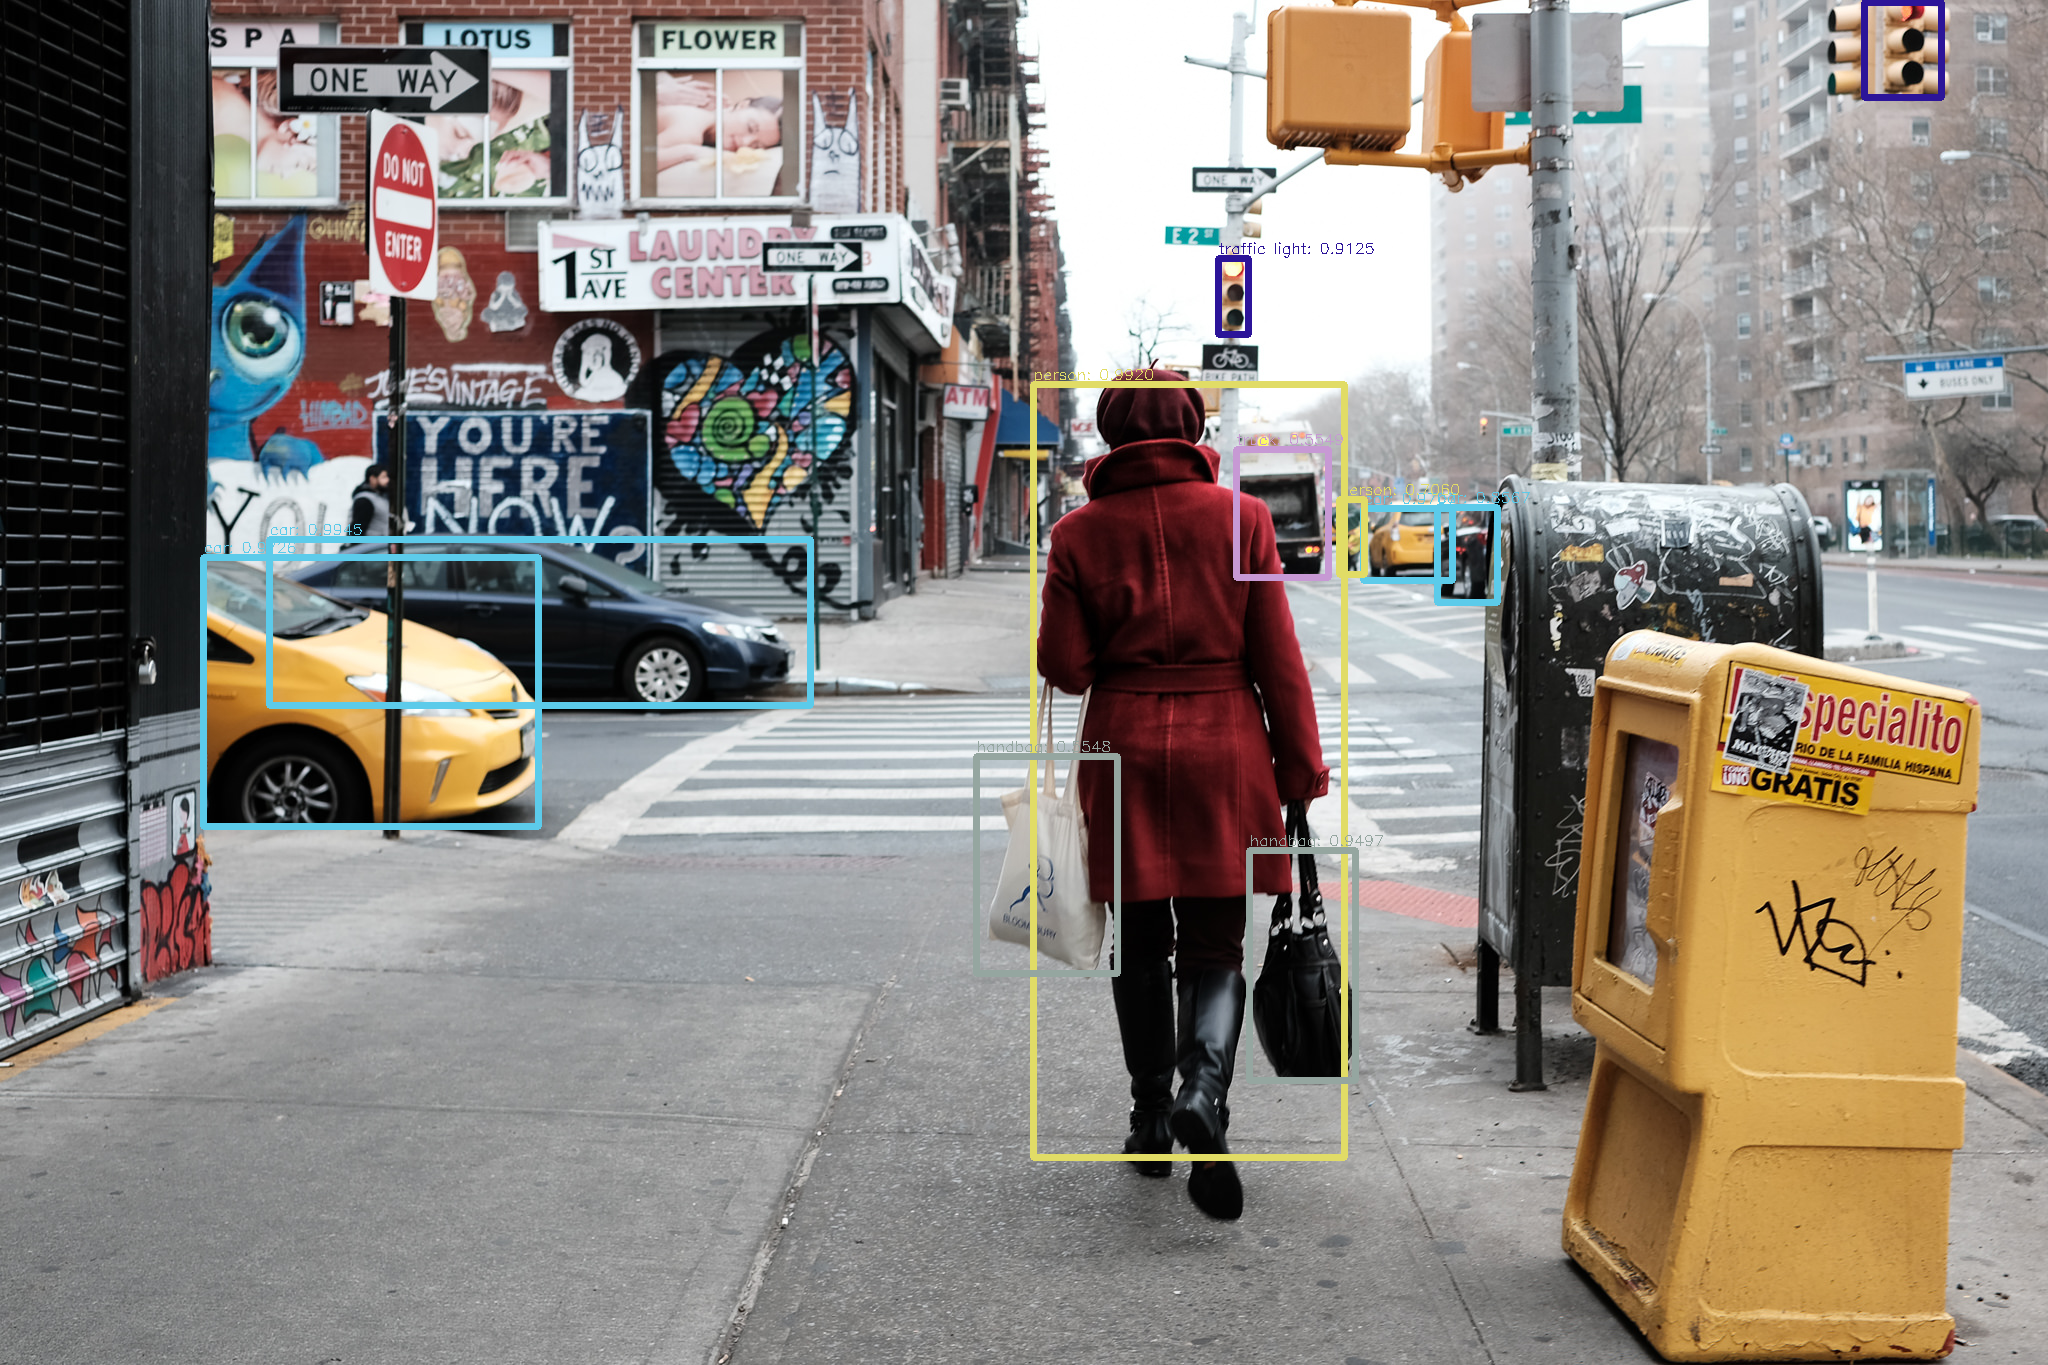

In [9]:
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

net.setInput(blob)
outputs = net.forward(ln)

boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 5)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
     

RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = Image.fromarray(RGB_img, 'RGB')
img.show()